In [1]:
#!pip install tabula-py

In [2]:
#import tabula

In [3]:
# file="C:/Users/AJAY SINGH/Downloads/Companies Assignment - Data.pdf"
# df = tabula.read_pdf(file, pages='all')

In [4]:
tabula.convert_into(file, "C:/Users/AJAY SINGH/Downloads/output.csv", output_format="csv", pages='all')


In [5]:
import pandas as pd
cd=pd.read_csv("C:/Users/AJAY SINGH/Downloads/output.csv")

In [6]:
cd.head(5)

,Unnamed: 0,Administration,Marketing Spend,State,Profit
0,Spend,NaN,NaN,NaN,NaN
1,165349.2,136897.80,471784.10,New York,192261.83
2,162597.7,151377.59,443898.53,California,191792.06
3,153441.51,101145.55,407934.54,Florida,191050.39
4,144372.41,118671.85,383199.62,New York,182901.99


In [7]:
cd['Spend']=cd['Unnamed: 0']

In [8]:
a=cd.drop('Unnamed: 0',axis=1)
a

,Administration,Marketing Spend,State,Profit,Spend
0,NaN,NaN,NaN,NaN,Spend
1,136897.800,471784.1000,New York,192261.83000,165349.2
2,151377.590,443898.5300,California,191792.06000,162597.7
3,101145.550,407934.5400,Florida,191050.39000,153441.51
4,118671.850,383199.6200,New York,182901.99000,144372.41
...,...,...,...,...,...
1019,118451.999,173232.6695,California,95279.96251,54135
1020,130390.080,329204.0228,California,164336.60550,134970
1021,241926.310,227142.8200,California,413956.48000,100275.47
1022,321652.140,281692.3200,California,333962.19000,128456.23


In [9]:
a=a.drop([0],axis=0)
a

,Administration,Marketing Spend,State,Profit,Spend
1,136897.800,471784.1000,New York,192261.83000,165349.2
2,151377.590,443898.5300,California,191792.06000,162597.7
3,101145.550,407934.5400,Florida,191050.39000,153441.51
4,118671.850,383199.6200,New York,182901.99000,144372.41
5,91391.770,366168.4200,Florida,166187.94000,142107.34
...,...,...,...,...,...
1019,118451.999,173232.6695,California,95279.96251,54135
1020,130390.080,329204.0228,California,164336.60550,134970
1021,241926.310,227142.8200,California,413956.48000,100275.47
1022,321652.140,281692.3200,California,333962.19000,128456.23


In [10]:
a.isnull().sum()


Administration     28
Marketing Spend    29
State              23
Profit             23
Spend              25
dtype: int64

In [11]:
a=a.fillna(method='ffill')

In [12]:
a

,Administration,Marketing Spend,State,Profit,Spend
1,136897.800,471784.1000,New York,192261.83000,165349.2
2,151377.590,443898.5300,California,191792.06000,162597.7
3,101145.550,407934.5400,Florida,191050.39000,153441.51
4,118671.850,383199.6200,New York,182901.99000,144372.41
5,91391.770,366168.4200,Florida,166187.94000,142107.34
...,...,...,...,...,...
1019,118451.999,173232.6695,California,95279.96251,54135
1020,130390.080,329204.0228,California,164336.60550,134970
1021,241926.310,227142.8200,California,413956.48000,100275.47
1022,321652.140,281692.3200,California,333962.19000,128456.23


In [13]:
#a.isnull().sum()

In [14]:
a.head(10)

,Administration,Marketing Spend,State,Profit,Spend
1,136897.80,471784.10,New York,192261.83,165349.2
2,151377.59,443898.53,California,191792.06,162597.7
3,101145.55,407934.54,Florida,191050.39,153441.51
4,118671.85,383199.62,New York,182901.99,144372.41
5,91391.77,366168.42,Florida,166187.94,142107.34
6,99814.71,362861.36,New York,156991.12,131876.9
7,147198.87,127716.82,California,156122.51,134615.46
8,145530.06,323876.68,Florida,155752.60,130298.13
9,148718.95,311613.29,New York,152211.77,120542.52
10,108679.17,304981.62,California,149759.96,123334.88


In [15]:
a.info()

In [16]:
a.describe()

In [17]:
import seaborn as sns

In [18]:
sns.set_style('dark')

In [19]:
sns.palplot(sns.color_palette("summer"))

In [20]:
a.columns

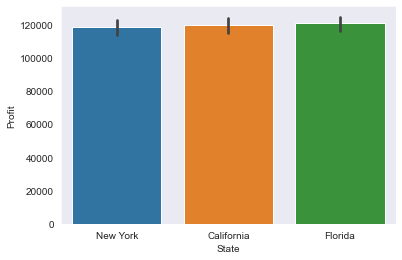

In [21]:
sns.barplot(data=a,x='State',y='Profit')

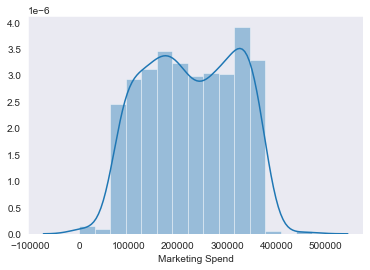

In [22]:
sns.distplot(a['Marketing Spend'])

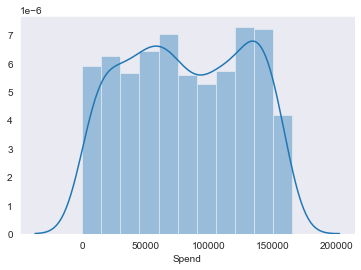

In [23]:
sns.distplot(a['Spend'])

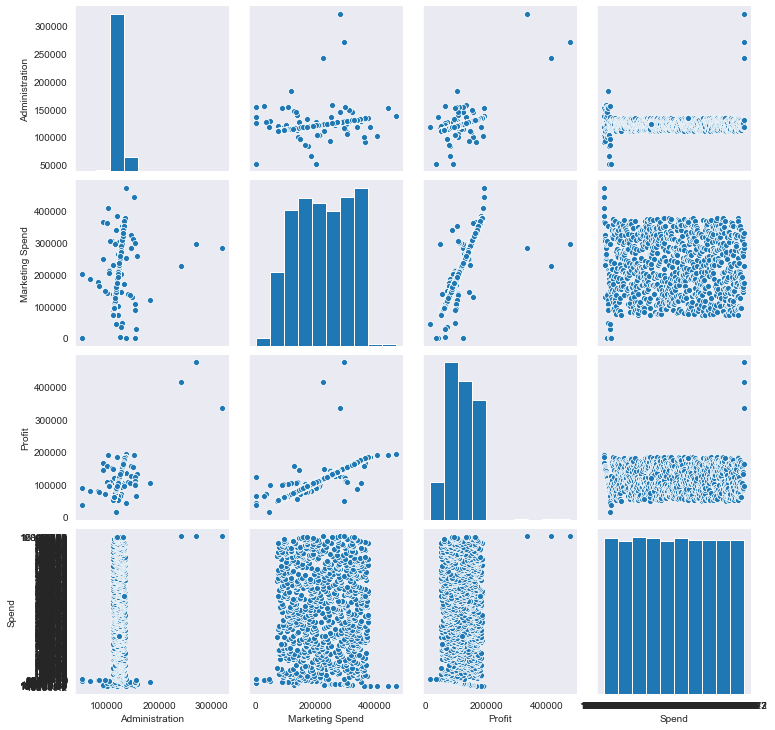

In [24]:
sns.pairplot(data=a)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [26]:
b=pd.get_dummies(a['State'])
b

,California,Florida,New York
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
5,0,1,0
...,...,...,...
1019,1,0,0
1020,1,0,0
1021,1,0,0
1022,1,0,0


In [30]:
 c=pd.concat([a,b],axis=1)
c=c.drop(['State'],axis=1)
c

,Administration,Marketing Spend,Profit,Spend,California,Florida,New York
1,136897.800,471784.1000,192261.83000,165349.2,0,0,1
2,151377.590,443898.5300,191792.06000,162597.7,1,0,0
3,101145.550,407934.5400,191050.39000,153441.51,0,1,0
4,118671.850,383199.6200,182901.99000,144372.41,0,0,1
5,91391.770,366168.4200,166187.94000,142107.34,0,1,0
...,...,...,...,...,...,...,...
1019,118451.999,173232.6695,95279.96251,54135,1,0,0
1020,130390.080,329204.0228,164336.60550,134970,1,0,0
1021,241926.310,227142.8200,413956.48000,100275.47,1,0,0
1022,321652.140,281692.3200,333962.19000,128456.23,1,0,0


In [129]:

X=c[['Spend','Marketing Spend','California','Administration','Florida','New York']]
y=c['Profit']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

In [140]:
X_train.shape,X_test.shape

((716, 6), (307, 6))

In [141]:
model=LinearRegression()

In [142]:
model.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred=model.predict(X_test)

In [144]:
y_pred

array([120734.9471608 , 135905.78891147,  54689.13834782,  80085.86061055,
       130133.23783509, 101732.14995015, 142979.90595595,  50976.92554919,
       106073.9243441 , 115806.97985484, 109423.15374491, 168369.86240804,
       123826.9384553 ,  93414.90412665, 151471.16740596, 121003.43845312,
        59369.50360312,  88368.69877522, 119652.60521058, 136570.82929928,
        63499.42231541,  95418.68949625, 160163.59340652,  81964.27804854,
       103104.08171057, 156631.58516368, 173779.43008773, 176712.373607  ,
        58761.95694288, 141784.74620049, 153246.61076076,  70327.35762187,
       178558.47872885,  86234.56269944, 129035.50986195,  74502.39130149,
       152143.73408797, 104693.51062764, 131508.79896291, 157264.87528455,
        91018.3662913 , 139109.79976794,  59548.85002832, 174111.52120723,
        57351.21312447, 181863.74738227, 155364.44275925,  86808.6426782 ,
       117102.73607614, 165130.37277161,  83478.09509691, 171120.12638997,
        79622.57683624, 1

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [146]:
accuracy=r2_score(y_test,y_pred)
accuracy

0.9359261429983156

In [147]:
print(f"The accuracy of the model is, {round(accuracy,2)}")

The accuracy of the model is, 0.94


In [149]:
#----------------------------------------------------------------------------------------------------------------